In [1]:
import pandas as pd

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.


In [2]:
a_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2020K3&CIVILSTAND=F', sep=';')
b_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=TOT%2CU&Tid=2020K3', sep=';')
c_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=G&Tid=*', sep=';')
d_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&Tid=2020K3&ALDER=*', sep=';')
#print(a_data)

5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

In [3]:
#A
divorced_before = a_data.iloc[0,2]
divorced_before_time = a_data.iloc[0,0]

divorced_after = a_data.iloc[1,2]
divorced_after_time = a_data.iloc[1,0]

divorced_change_proc = round(((divorced_after/divorced_before)-1)*100,2)

change_type = 'increased' if divorced_change_proc >= 0 else 'decreased'
message = ('The amount of divorced people has ' + change_type + ' by ' + str(divorced_change_proc) 
           + '% from ' + divorced_before_time + ' to ' + divorced_after_time)

print(message)

The amount of divorced people has increased by 28.41% from 2008K1 to 2020K3


In [4]:
#B
#Masks
mask_not_country = (b_data[:]['OMRÅDE'] != 'Hele landet')
mask_not_region = (b_data[:]['OMRÅDE'].str.contains('Region') == False)
mask_not_city = mask_not_country & mask_not_region

mask_all_status = (b_data[:]['CIVILSTAND'] == 'I alt')
mask_unmarried_status = (b_data[:]['CIVILSTAND'] == 'Ugift')

b_filtered_all_data = b_data[mask_not_city & mask_all_status]
five_largest = b_filtered_all_data.sort_values('INDHOLD', ascending=False)[:5]

b_filtered_unmarried_data = b_data[mask_not_city & mask_unmarried_status]
five_largest_unmarried = b_filtered_unmarried_data.sort_values('INDHOLD', ascending=False)[:5]

highest = {'area':'Nowhere', 'proc':0}

for area in five_largest['OMRÅDE']:
    full_amount = int(five_largest[(five_largest[:]['OMRÅDE'] == area)]['INDHOLD'])
    unmarried_amount = int(b_data[mask_not_city & mask_unmarried_status & (b_data[:]['OMRÅDE'] == area)]['INDHOLD'])
    city_proc = round((unmarried_amount/full_amount)*100,2)
    if city_proc > highest['proc']:
        highest['area'] = area
        highest['proc'] = city_proc

print('Of the 5 biggest cities, ' + highest['area'] + ' has the largest unmarried rate, with ' + str(highest['proc']) + "%")

five_largest
#five_largest_unmarried

Of the 5 biggest cities, København has the largest unmarried rate, with 65.43%


,OMRÅDE,CIVILSTAND,TID,INDHOLD
4,København,I alt,2020K3,633035
168,Aarhus,I alt,2020K3,349433
208,Aalborg,I alt,2020K3,217316
116,Odense,I alt,2020K3,204718
142,Vejle,I alt,2020K3,116468


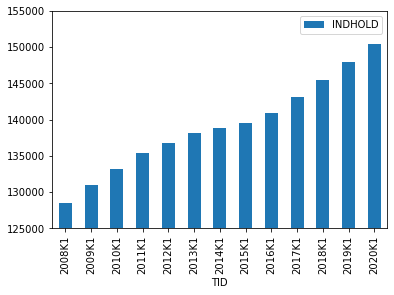

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

smaller_c_data = c_data[(c_data[:]['TID'].str.contains('K1'))]
bar_data = smaller_c_data;
#bar_data = c_data;

bar_data.plot(kind="bar", x='TID', y='INDHOLD')

plt.ylim(125000,155000)
plt.show()

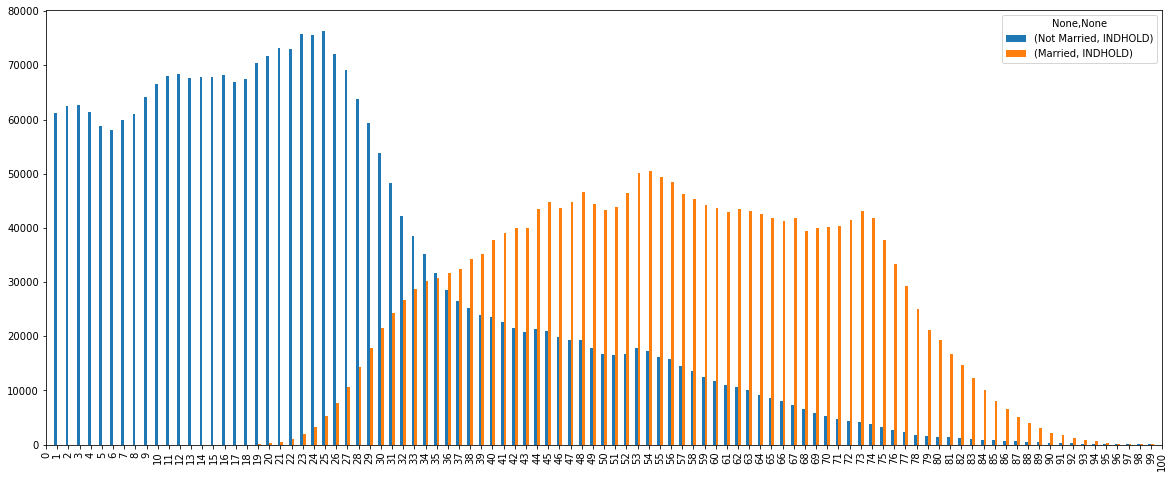

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

married_data = d_data[(d_data[:]['CIVILSTAND'].str.contains('Gift')) & (d_data[:]['ALDER'] != 'I alt')].reset_index(drop=True)
not_married_data = d_data[(d_data[:]['CIVILSTAND'].str.contains('Ugift')) & (d_data[:]['ALDER'] != 'I alt')].reset_index(drop=True)

data = pd.concat([not_married_data, married_data], axis=1, keys=['Not Married','Married'])

data.plot(kind="bar", figsize=(20,8))
plt.xlim(0,100)

plt.show()